# Comparing performance of different Nose-hoover thermostat parameters in my MNDO S0 sampling runs.

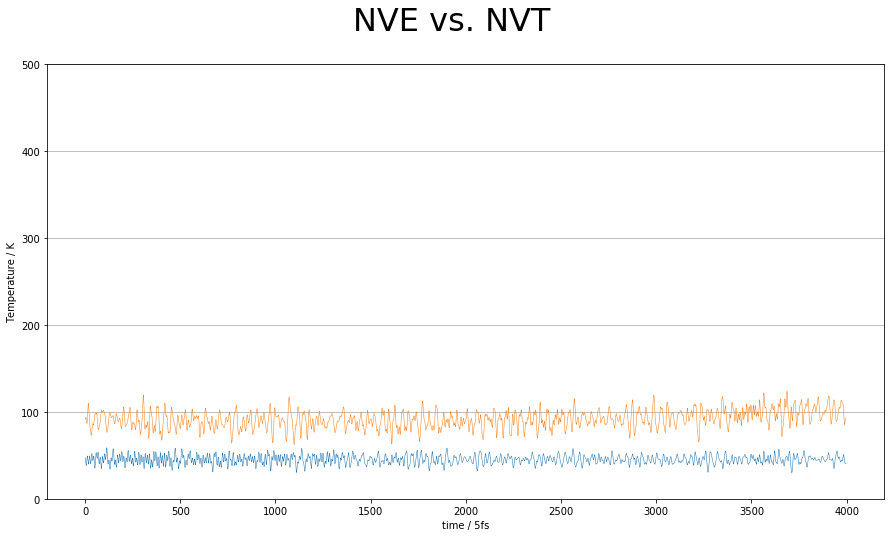

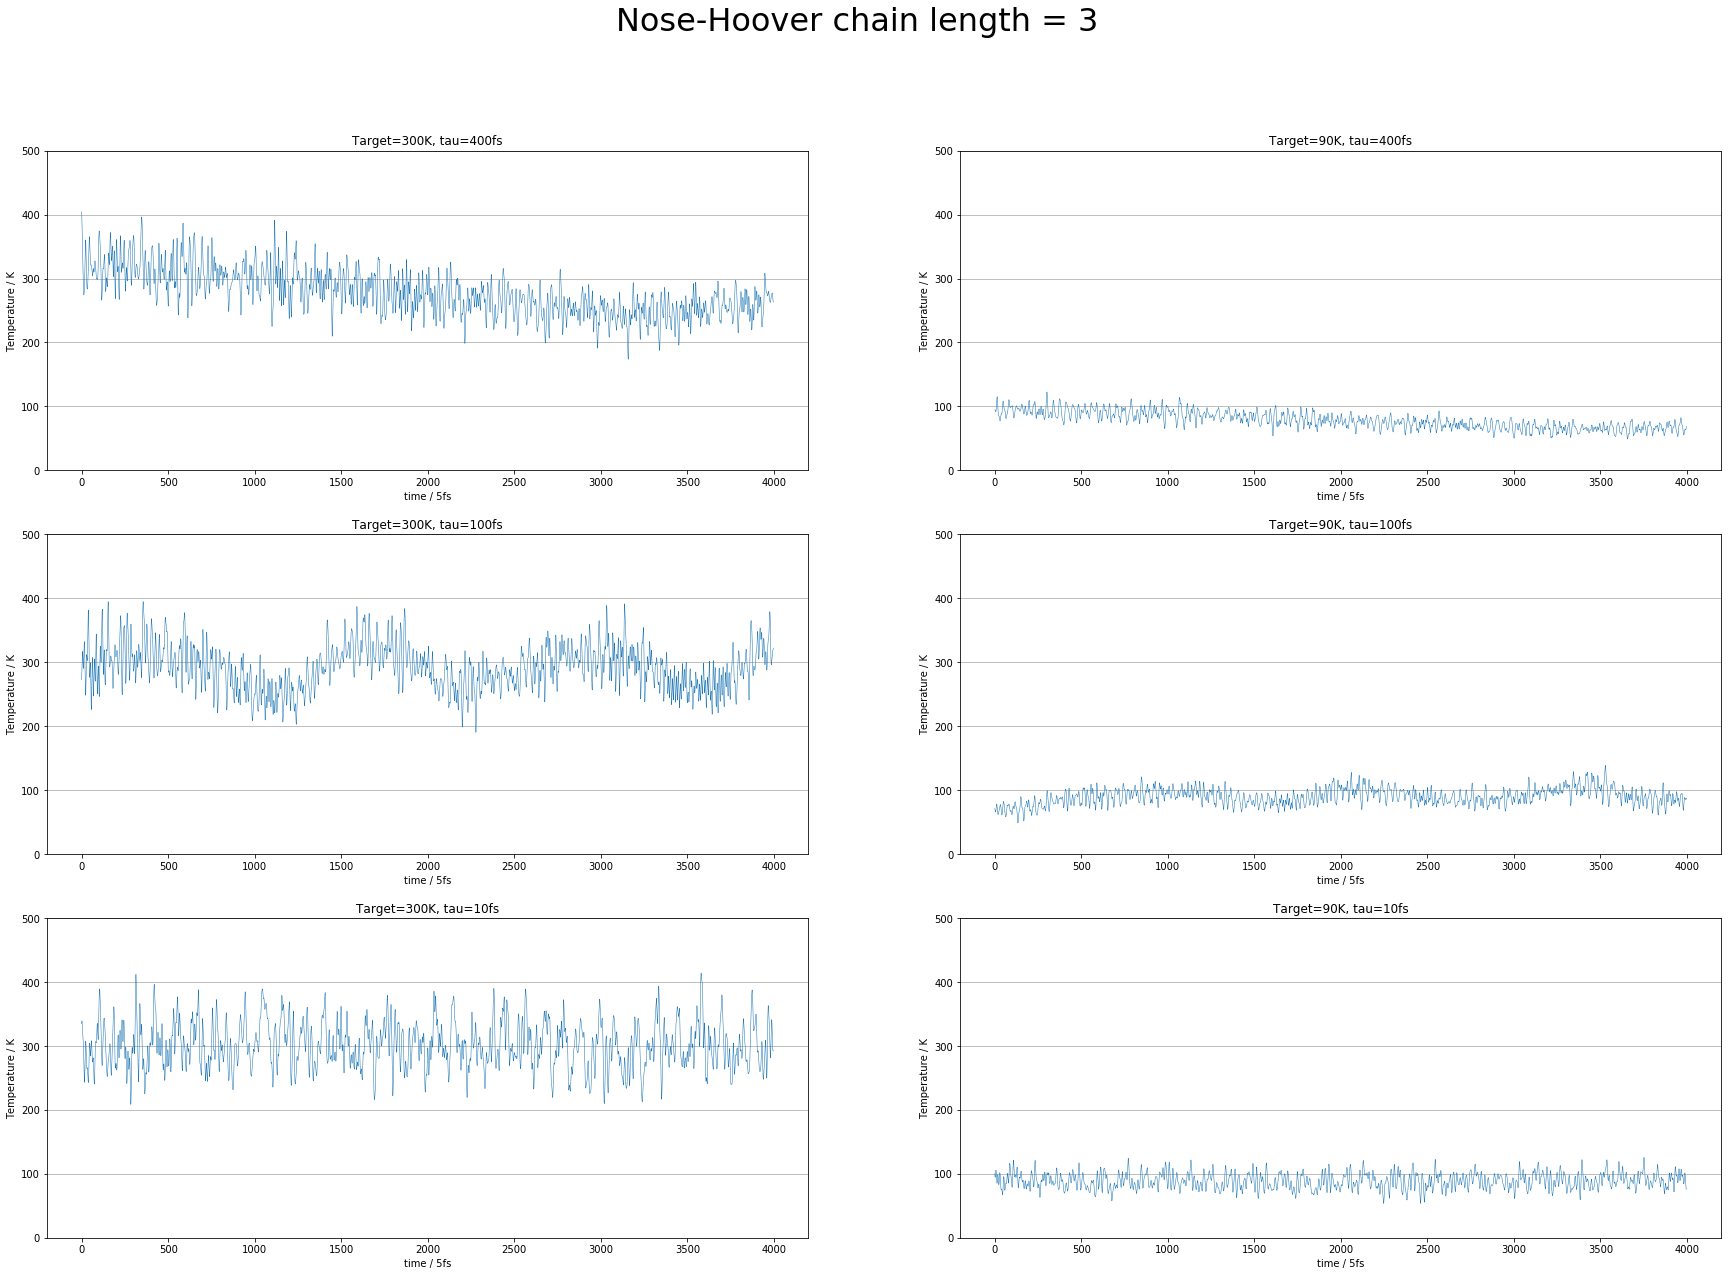

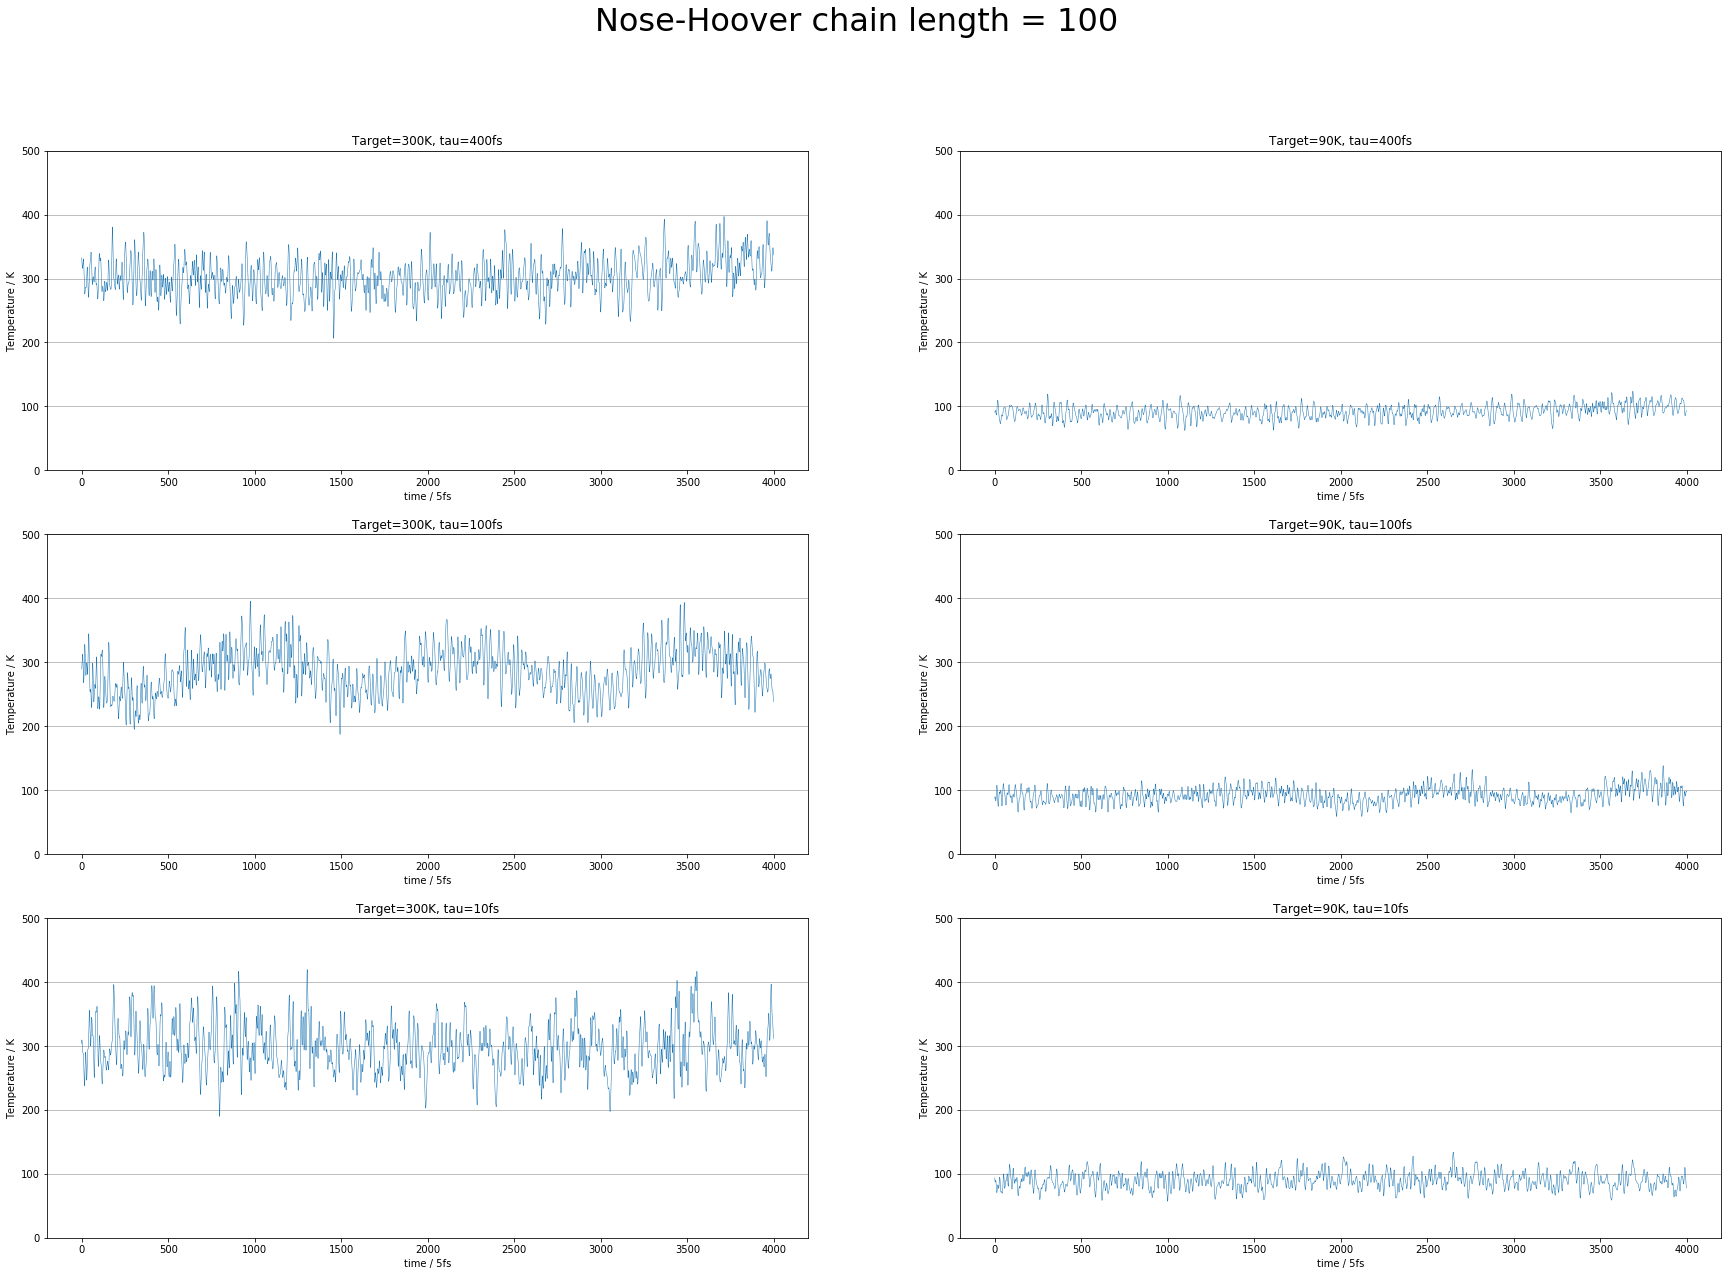

In [239]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

length = 3998 # Better an even number, makes Fourier part clearer.

h5 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h5.dat", skip_header=1, skip_footer=0)
h5 = h5[-length:]
h1 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h1.dat", skip_header=1, skip_footer=0)
h1 = h1[-length:]
h2 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h2.dat", skip_header=1, skip_footer=0)
h2 = h2[-length:]
h6 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h6.dat", skip_header=1, skip_footer=0)
h6 = h6[-length:]
h3 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h3.dat", skip_header=1, skip_footer=0)
h3 = h3[-length:]
h4 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/h4.dat", skip_header=1, skip_footer=0)
h4 = h4[-length:]

t5 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t5.dat", skip_header=1, skip_footer=0)
t5 = t5[-length:]
t1 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t1.dat", skip_header=1, skip_footer=0)
t1 = t1[-length:]
t2 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t2.dat", skip_header=1, skip_footer=0)
t2 = t2[-length:]
t6 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t6.dat", skip_header=1, skip_footer=0)
t6 = t6[-length:]
t3 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t3.dat", skip_header=1, skip_footer=0)
t3 = t3[-length:]
t4 = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/t4.dat", skip_header=1, skip_footer=0)
t4 = t4[-length:]

nve = np.genfromtxt("/home/winter/onsager/tsqm/dynamics/nve90.dat", skip_header=1, skip_footer=0)
nve = nve[-length:]

def temp_series(ax, data):
    out = ax.plot(data,linewidth=0.5)
    ax.set_ylim(0,500)
    ax.set_xlabel('time / 5fs')
    ax.set_ylabel('Temperature / K')
    ax.grid(True,axis='y')
    return out

fig0, ax = plt.subplots(figsize=(15,8))
fig0.suptitle('NVE vs. NVT',fontsize=32)
temp_series(ax, nve)
temp_series(ax, t6)

fig1, ((ax5, ax6), (ax1, ax3), (ax2, ax4)) = plt.subplots(3,2,figsize=(30,20))
fig1.suptitle('Nose-Hoover chain length = 3',fontsize=32)

ax5.set_title("Target=300K, tau=400fs")
temp_series(ax5, h5)

ax1.set_title("Target=300K, tau=100fs")
temp_series(ax1, h1)

ax2.set_title("Target=300K, tau=10fs")
temp_series(ax2, h2)

ax6.set_title("Target=90K, tau=400fs")
temp_series(ax6, h6)

ax3.set_title("Target=90K, tau=100fs")
temp_series(ax3, h3)

ax4.set_title("Target=90K, tau=10fs")
temp_series(ax4, h4)

fig2, ((ax5, ax6), (ax1, ax3), (ax2, ax4)) = plt.subplots(3,2,figsize=(30,20))
fig2.suptitle('Nose-Hoover chain length = 100',fontsize=32)

ax5.set_title("Target=300K, tau=400fs")
temp_series(ax5, t5)

ax1.set_title("Target=300K, tau=100fs")
temp_series(ax1, t1)

ax2.set_title("Target=300K, tau=10fs")
temp_series(ax2, t2)

ax6.set_title("Target=90K, tau=400fs")
temp_series(ax6, t6)

ax3.set_title("Target=90K, tau=100fs")
temp_series(ax3, t3)

ax4.set_title("Target=90K, tau=10fs")
temp_series(ax4, t4)

# Trying Fourier transform on the time series:
First, a test case on artificial sine data.

the mean is: 5.607058879320369
the mean is: 5.607058879320369
the mean is: 5.607058879320369
the mean is: 5.607058879320369


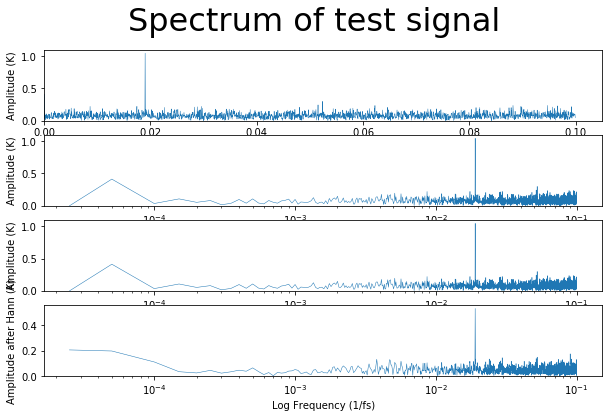

In [240]:
from scipy import fftpack
from scipy import signal

def spectrum(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(x-np.mean(x)) # removing zeroth frequency 
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    out = ax.plot(freqs[:N], 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    return out

def spectrum_log(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(x-np.mean(x))
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_ylim(bottom=0)
    return out

# Probably need to add code to average over slices
def spectrum_hannlog(ax, x):
    print ("the mean is:", np.mean(x))
    hann = np.hanning(len(x))
    X = fftpack.fft((x-np.mean(x))*hann)
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude after Hann (K)')
    ax.set_ylim(bottom=0)
    return out

def spectrum_detrendlog(ax, x):
    print ("the mean is:", np.mean(x))
    X = fftpack.fft(signal.detrend(x)) #sometimes detrend is equivalent to subtracting mean, because the fit is linear.
    N = int(len(X)/2) # only retaining real positive frequency
    freqs = fftpack.fftfreq(len(x),d=timestep)
    ax.set_xscale('log')
    freqs4log = freqs[:N]
    freqs4log[0] = freqs[1]*0.5 # A trick to show y(x=0) in a semilog plot as the smallest freq. 
    out = ax.plot(freqs4log, 1/N*np.abs(X[:N]), linewidth=0.5)
    ax.set_xlabel('Log Frequency (1/fs)')
    ax.set_ylabel('Amplitude (K)')
    ax.set_ylim(bottom=0)
    return out

timestep = 5 # MD time step in fs.
f_s = 1/timestep # sampling frequency in fs^-1
time = np.linspace(0,length*timestep,length)
testsig = np.sin(2*np.pi*0.019*time)+10*np.random.rand(len(time)) + np.sin(2*np.pi*0.000025*time) # So the fluctuation has freq. of 0.019 fs^-1

fig3, (axno, axlog, axdetrend, axhannlog) = plt.subplots(4,1,figsize=(10,6))
fig3.suptitle('Spectrum of test signal',fontsize=32)

spectrum(axno, testsig)
spectrum_log(axlog, testsig)
spectrum_detrendlog(axdetrend, testsig)
spectrum_hannlog(axhannlog, testsig)

# Test case is good, with X and Y axis in correct physical scale, now test on real data.

the mean is: 91.72793122473738
the mean is: 91.72793122473738
the mean is: 91.72793122473738
the mean is: 91.72793122473738


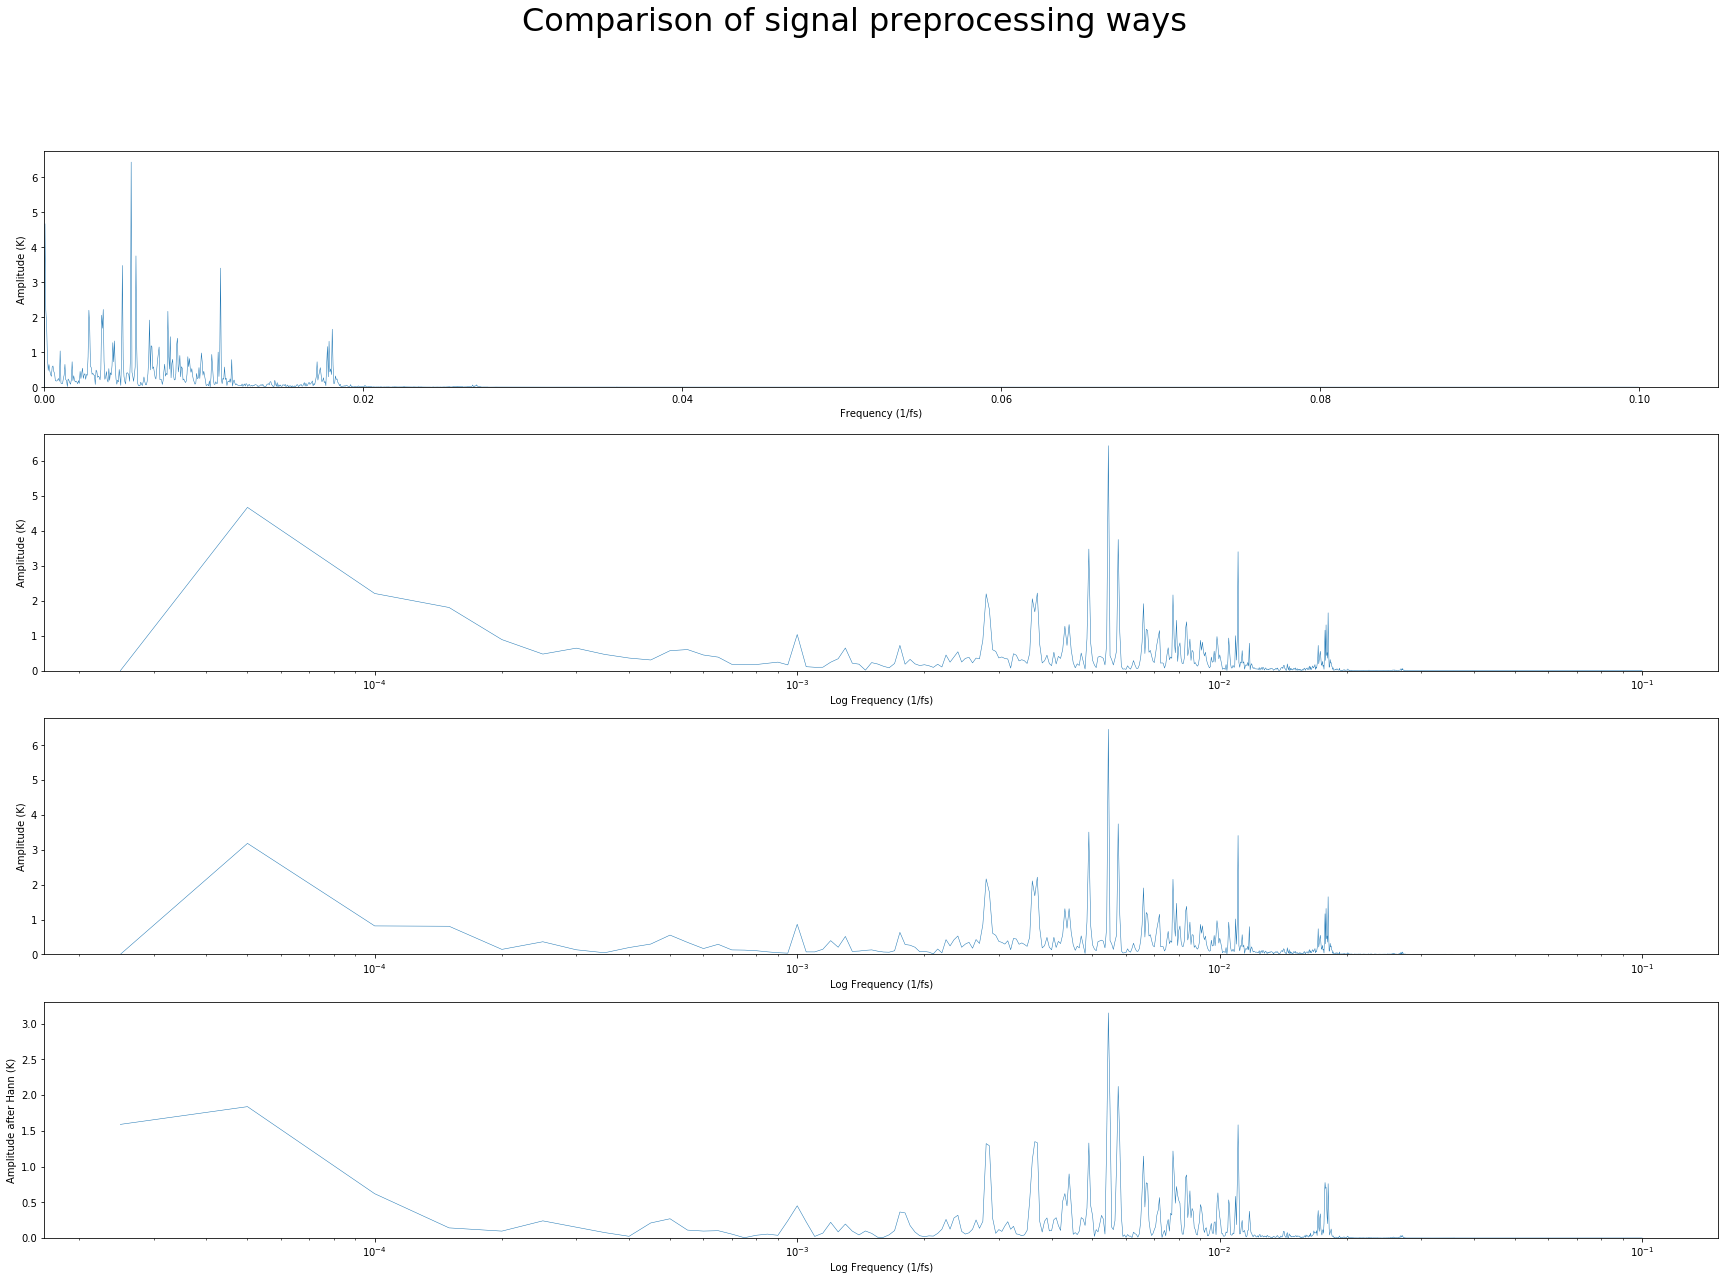

In [241]:
fig4, (axno, axlog, axdetrend, axhannlog) = plt.subplots(4,1,figsize=(30,20))
fig4.suptitle('Comparison of signal preprocessing ways',fontsize=32)

spectrum(axno, t6)
spectrum_log(axlog, t6)
spectrum_detrendlog(axdetrend, t6)
spectrum_hannlog(axhannlog, t6)

# Not quite sensitive to how I preprocess... 
# Now plot for different thermostat settings using detrended log spectra.

the mean is: 302.7474512130565
the mean is: 302.7474512130565
the mean is: 286.206050245948
the mean is: 286.2060502459481
the mean is: 297.89104795650326
the mean is: 297.89104795650326
the mean is: 91.72793122473738
the mean is: 91.72793122473739
the mean is: 92.1641296075788
the mean is: 92.16412960757881
the mean is: 90.02804945590294
the mean is: 90.02804945590294
the mean is: 278.1155913473987
the mean is: 278.1155913473988
the mean is: 291.4263564972986
the mean is: 291.4263564972987
the mean is: 301.71101080977985
the mean is: 301.71101080977985
the mean is: 78.34997105885442
the mean is: 78.34997105885444
the mean is: 90.067840506028
the mean is: 90.06784050602802
the mean is: 88.98536134917458
the mean is: 88.9853613491746


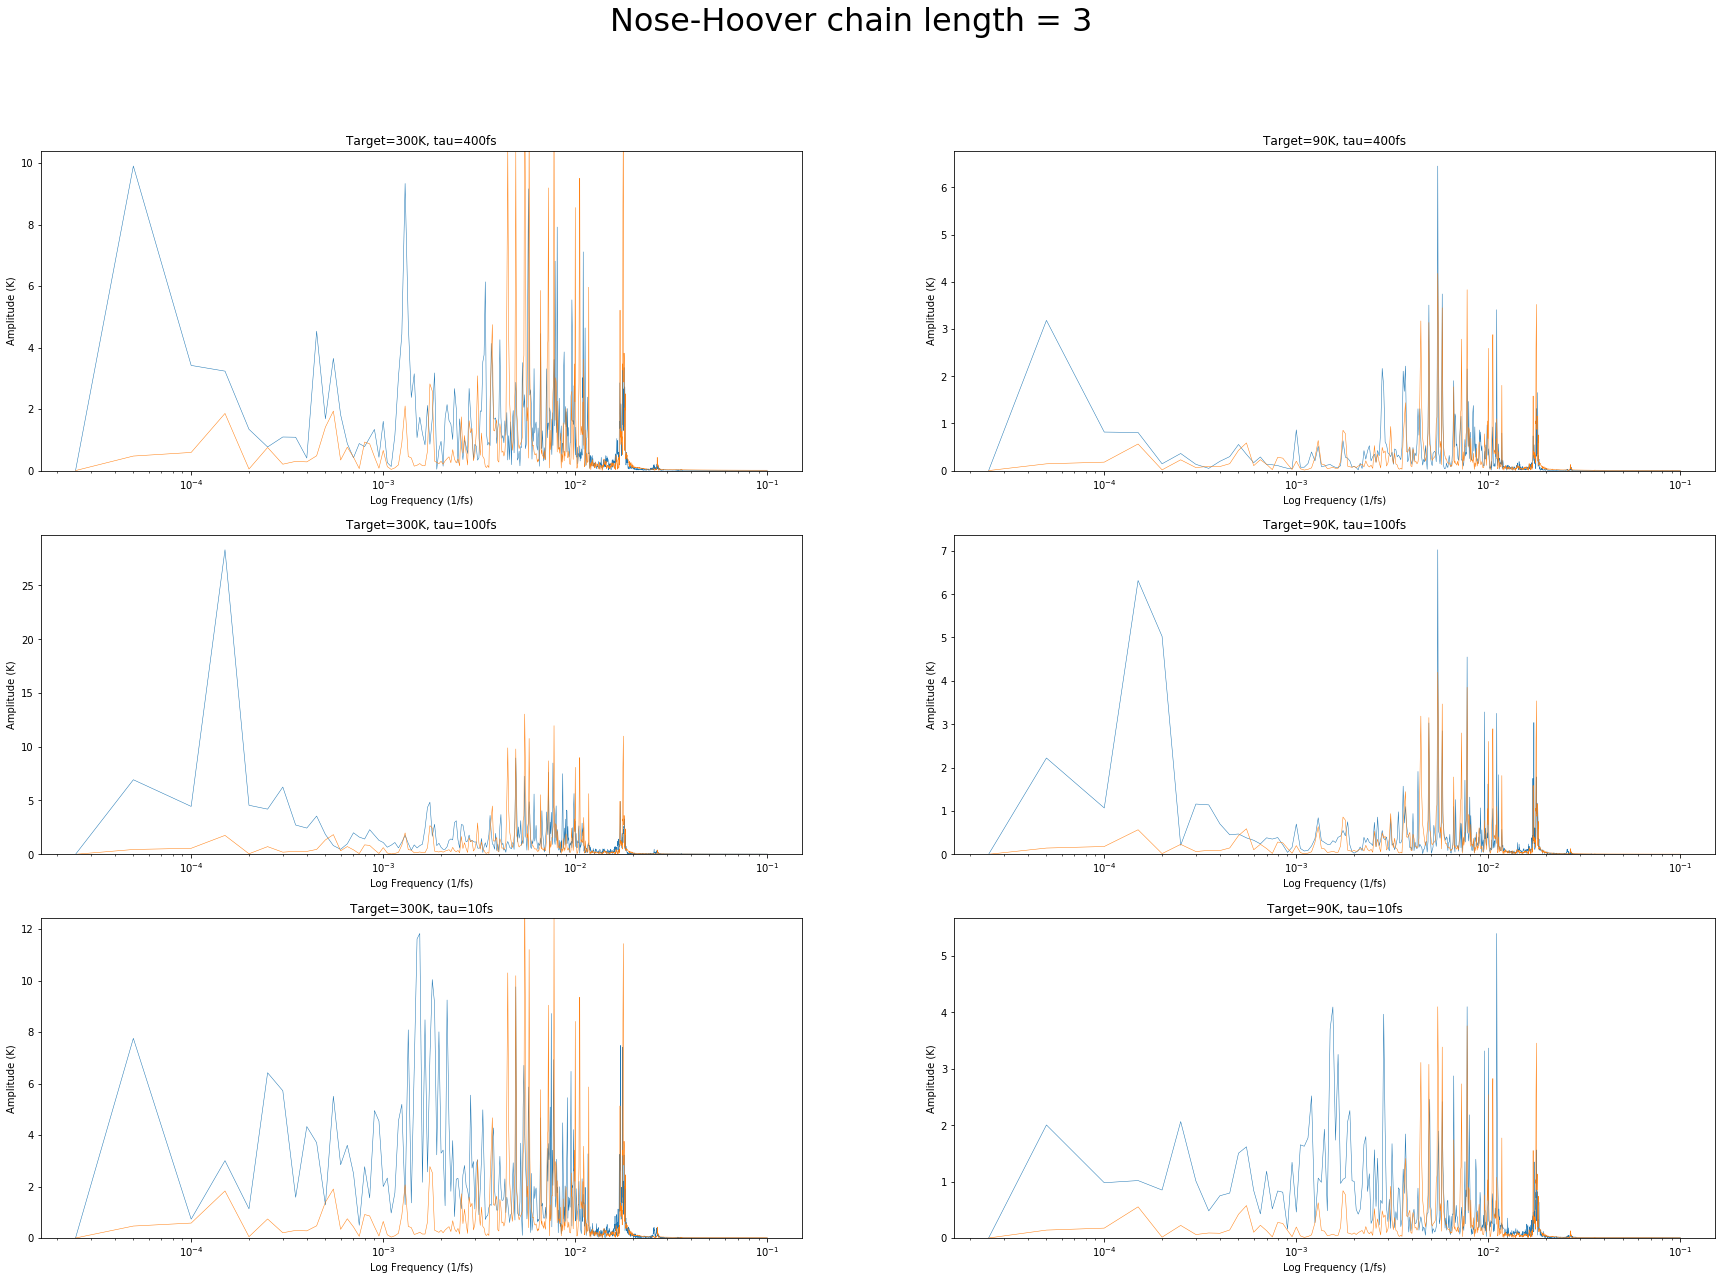

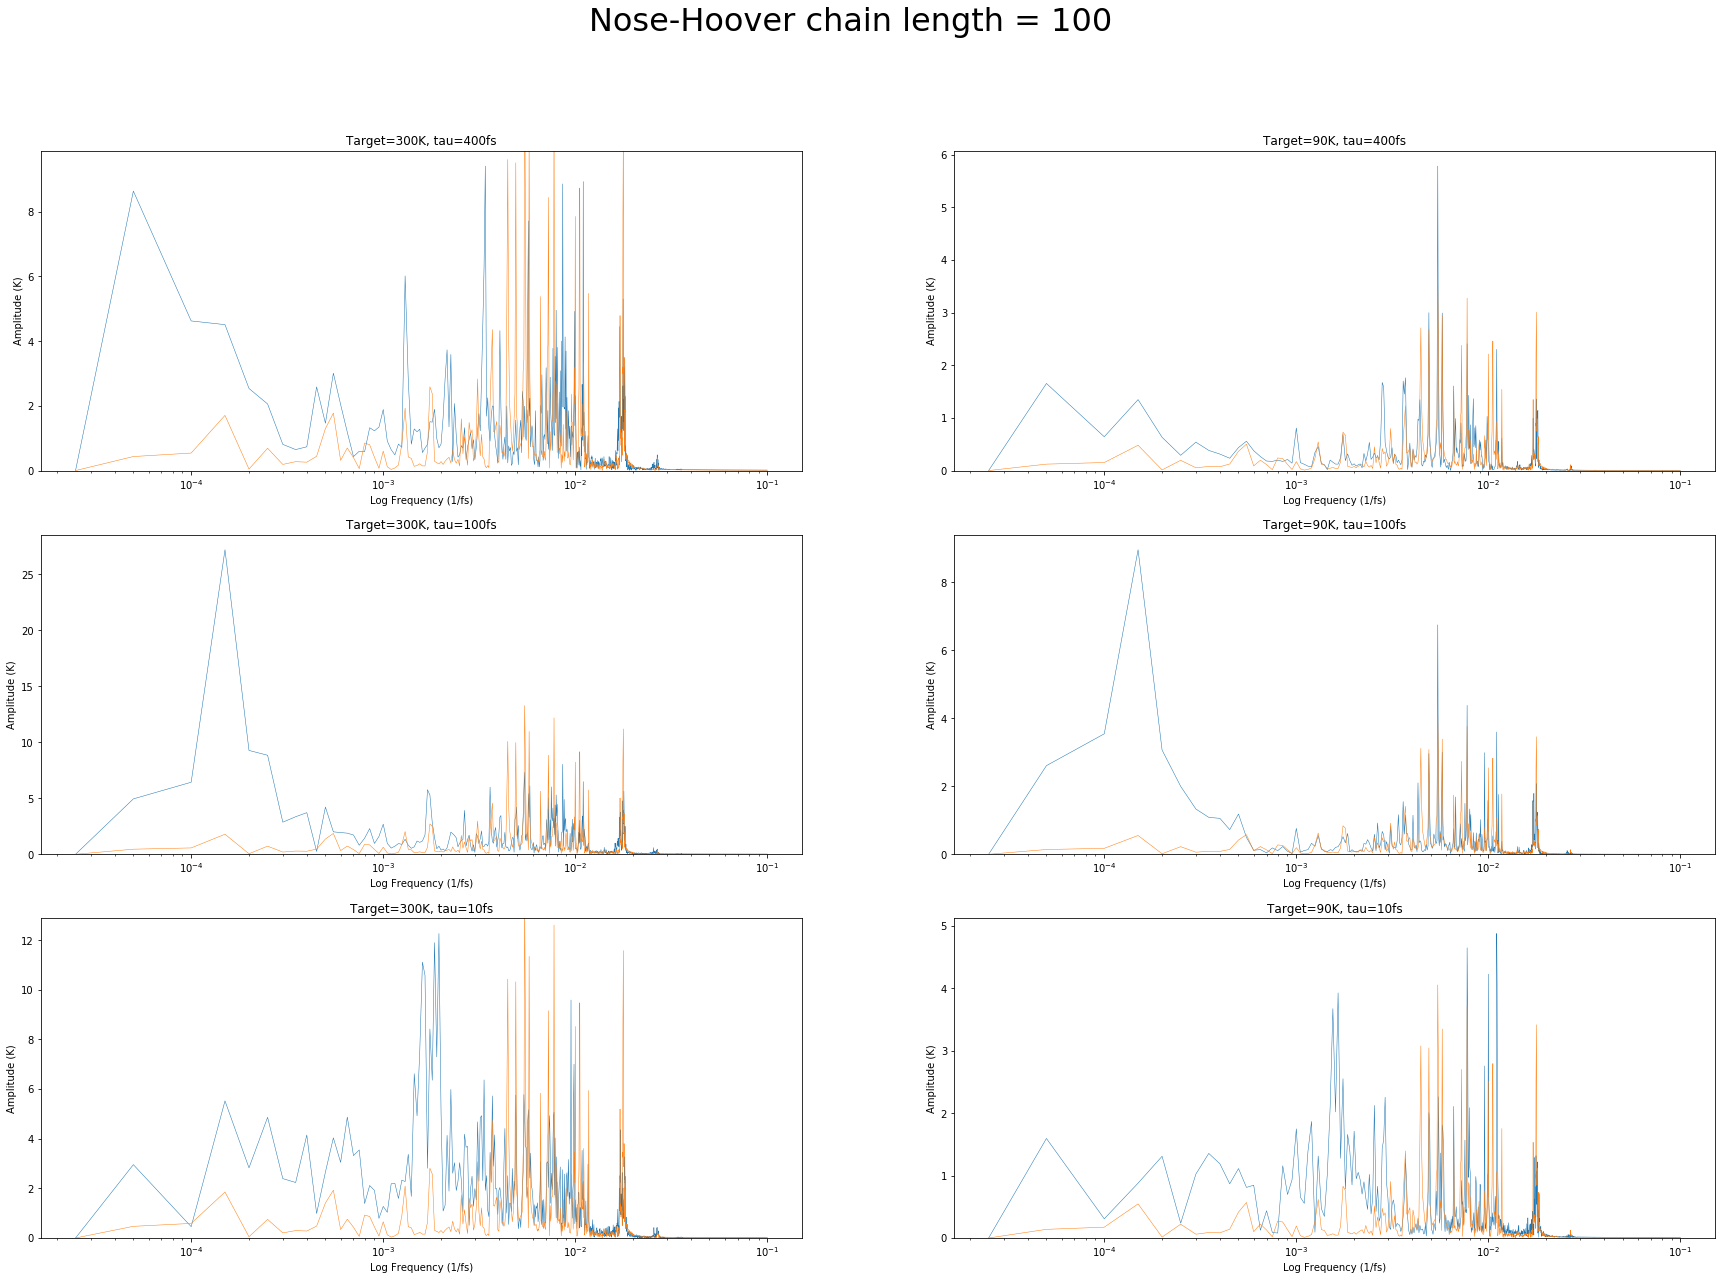

In [242]:
fig5, ((ax5, ax6), (ax1, ax3), (ax2, ax4)) = plt.subplots(3,2,figsize=(30,20))
fig5.suptitle('Nose-Hoover chain length = 3',fontsize=32)

ax5.set_title("Target=300K, tau=400fs")
spectrum_detrendlog(ax5, t5)
spectrum_detrendlog(ax5, nve * np.mean(t5)/np.mean(nve))   # to account for that T_fluctuation~T

ax1.set_title("Target=300K, tau=100fs")
spectrum_detrendlog(ax1, t1)
spectrum_detrendlog(ax1, nve * np.mean(t1)/np.mean(nve))   # to account for that T_fluctuation~T

ax2.set_title("Target=300K, tau=10fs")
spectrum_detrendlog(ax2, t2)
spectrum_detrendlog(ax2, nve * np.mean(t2)/np.mean(nve))   # to account for that T_fluctuation~T

ax6.set_title("Target=90K, tau=400fs")
spectrum_detrendlog(ax6, t6)
spectrum_detrendlog(ax6, nve * np.mean(t6)/np.mean(nve))   # to account for that T_fluctuation~T

ax3.set_title("Target=90K, tau=100fs")
spectrum_detrendlog(ax3, t3)
spectrum_detrendlog(ax3, nve * np.mean(t3)/np.mean(nve))   # to account for that T_fluctuation~T

ax4.set_title("Target=90K, tau=10fs")
spectrum_detrendlog(ax4, t4)
spectrum_detrendlog(ax4, nve * np.mean(t4)/np.mean(nve))   # to account for that T_fluctuation~T

fig6, ((ax5, ax6), (ax1, ax3), (ax2, ax4)) = plt.subplots(3,2,figsize=(30,20))
fig6.suptitle('Nose-Hoover chain length = 100',fontsize=32)

ax5.set_title("Target=300K, tau=400fs")
spectrum_detrendlog(ax5, h5)
spectrum_detrendlog(ax5, nve * np.mean(h5)/np.mean(nve))   # to account for that T_fluctuation~T

ax1.set_title("Target=300K, tau=100fs")
spectrum_detrendlog(ax1, h1)
spectrum_detrendlog(ax1, nve * np.mean(h1)/np.mean(nve))   # to account for that T_fluctuation~T

ax2.set_title("Target=300K, tau=10fs")
spectrum_detrendlog(ax2, h2)
spectrum_detrendlog(ax2, nve * np.mean(h2)/np.mean(nve))   # to account for that T_fluctuation~T

ax6.set_title("Target=90K, tau=400fs")
spectrum_detrendlog(ax6, h6)
spectrum_detrendlog(ax6, nve * np.mean(h6)/np.mean(nve))   # to account for that T_fluctuation~T

ax3.set_title("Target=90K, tau=100fs")
spectrum_detrendlog(ax3, h3)
spectrum_detrendlog(ax3, nve * np.mean(h3)/np.mean(nve))   # to account for that T_fluctuation~T

ax4.set_title("Target=90K, tau=10fs")
spectrum_detrendlog(ax4, h4)
spectrum_detrendlog(ax4, nve * np.mean(h4)/np.mean(nve))   # to account for that T_fluctuation~T

# Printing and ploting the peak frequecies:

[0.0036018  0.00730365 0.01825913 0.00765383 0.0106053  0.00955478
 0.01110555 0.00485243 0.0018009  0.00555278 0.00175088 0.01045523
 0.00795398 0.01790895 0.00770385 0.01785893 0.00790395 0.00310155
 0.0058029  0.01765883 0.00535268 0.0176088  0.00990495 0.00365183
 0.018009   0.0078039  0.01105553 0.0054027  0.01795898 0.00715358
 0.0072036  0.00450225 0.00370185 0.01710855 0.0044022  0.0066033
 0.01175588 0.01050525 0.00550275 0.01770885 0.010005   0.00725363
 0.01055528 0.01775888 0.00490245 0.00445223 0.00575288 0.0178089
 0.00775388 0.00545273]


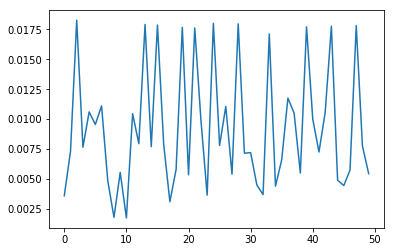

In [243]:
X = fftpack.fft(signal.detrend(nve))
N = int(len(X)/2)
freqs = fftpack.fftfreq(len(nve),d=timestep)
freqs = freqs[:N]
Y = 1/N*np.abs(X[:N])
modes = freqs[Y.argsort()]
print (modes[-50:])
plt.plot(modes[-50:])

# To show temporal change, plot spectrograms: